In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [10]:
type(y_train)

pandas.core.series.Series

In [11]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [12]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [16]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       105
           1       0.48      0.53      0.50        49

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.68      0.67      0.67       154



In [18]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

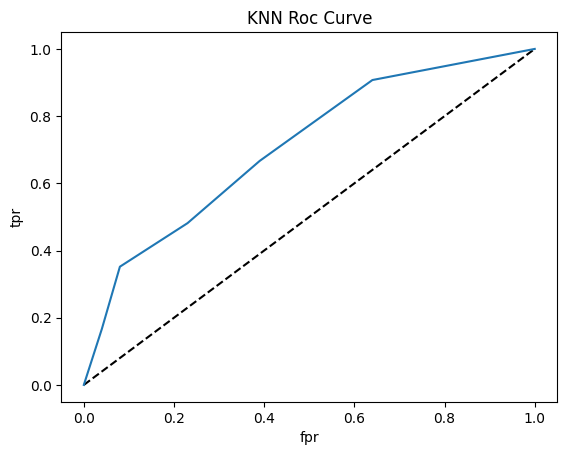

In [20]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN Roc Curve')
plt.show()

In [21]:
roc_auc_score(y_test, y_pred_proba)

0.7081481481481482

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_neighbors':np.arange(1, 50)}

In [24]:
knn_grid = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_grid, param_grid, cv = 5)

knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
knn_cv.best_score_

0.7578558696205755

In [27]:
knn_cv.best_params_

{'n_neighbors': 14}